In [1]:
load_or_install = function(list.of.packages){
    new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
    if(length(new.packages)) install.packages(new.packages)
    for(pkg in list.of.packages)
        library(pkg,character.only=TRUE)
}

# Variable Selection

In [2]:
load_or_install('MASS')
load_or_install('leaps')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
data(mtcars)

In [4]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [5]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

In [6]:
?regsubsets

regsubsets {leaps},R Documentation
x,"design matrix or model formula for full model, or biglm object"
data,Optional data frame
y,response vector
weights,weight vector
nbest,number of subsets of each size to record
nvmax,maximum size of subsets to examine
force.in,index to columns of design matrix that should be in all models
force.out,index to columns of design matrix that should be in no models
intercept,Add an intercept?
method,"Use exhaustive search, forward selection, backward selection or sequential replacement to search."


In [7]:
dim(mtcars)

[1] 32 11

In [8]:
ss_mods = regsubsets(mpg~.,data=mtcars,method="forward",nvmax=10)

In [9]:
summary(ss_mods)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, method = "forward", 
    nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 )  "*" " "  "*" " "  "*" " "  " " " " " "  " " 
4  ( 1 )  "*" " "  "*" " "  "*" " "  " " "*" " "  " " 
5  ( 1 )  "*" " "  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  "*" "*"  "*" " "  "*" "*"  " " "*" " "  " " 
7  ( 1 )  "*" "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
8  ( 1 )  "*" "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
9  ( 1 )  "*" "*" 

In [10]:
ss_mods = regsubsets(mpg~.,data=mtcars,method="backward",nvmax=10)

In [11]:
summary(ss_mods)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, method = "backward", 
    nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  " " " "  " " " "  "*" "*"  " " " " " "  " " 
3  ( 1 )  " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 )  " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 )  " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 )  " " "*

In [12]:
ss_mods = regsubsets(mpg~.,data=mtcars,method="exhaustive",nvmax=10)

In [13]:
summary(ss_mods)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, method = "exhaustive", 
    nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 )  " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 )  " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 )  " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 )  " 

In [14]:
smry = summary(ss_mods)

In [15]:
names(smry)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [16]:
smry$which

,(Intercept),cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
4,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
5,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
6,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
7,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
8,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
9,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [17]:
smry$rsq

[1] 0.7528328 0.8302274 0.8496636 0.8578510 0.8637377 0.8667078 0.8680976
 [8] 0.8687064 0.8689448 0.8690158

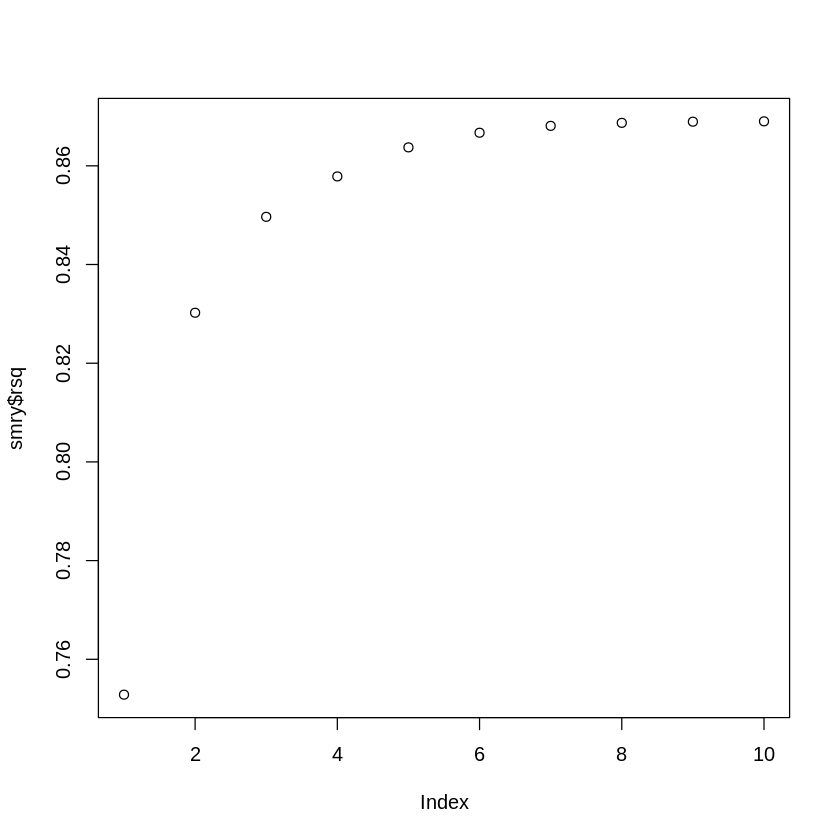

In [18]:
plot(smry$rsq)

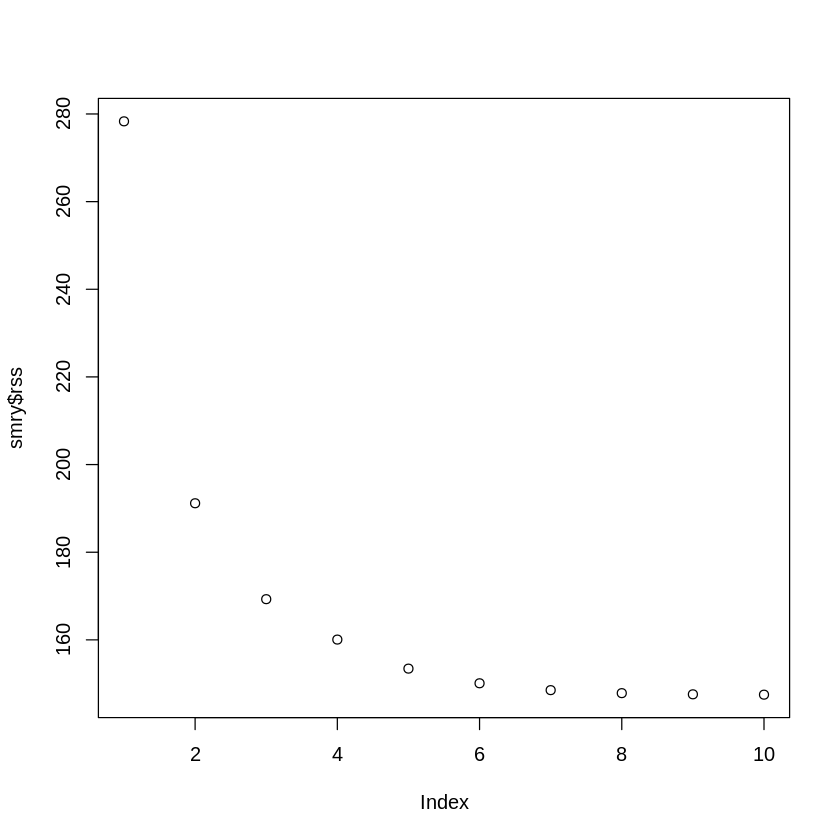

In [19]:
plot(smry$rss)

In [20]:
smry$adjr2

[1] 0.7445939 0.8185189 0.8335561 0.8367919 0.8375334 0.8347177 0.8296261
 [8] 0.8230390 0.8153314 0.8066423

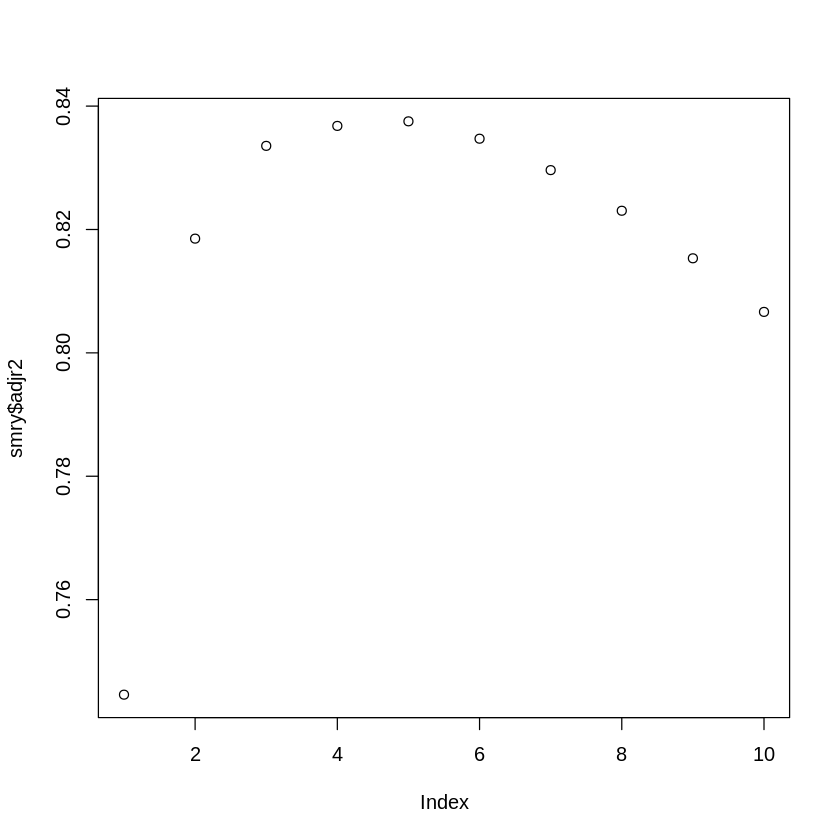

In [21]:
plot(smry$adjr2)

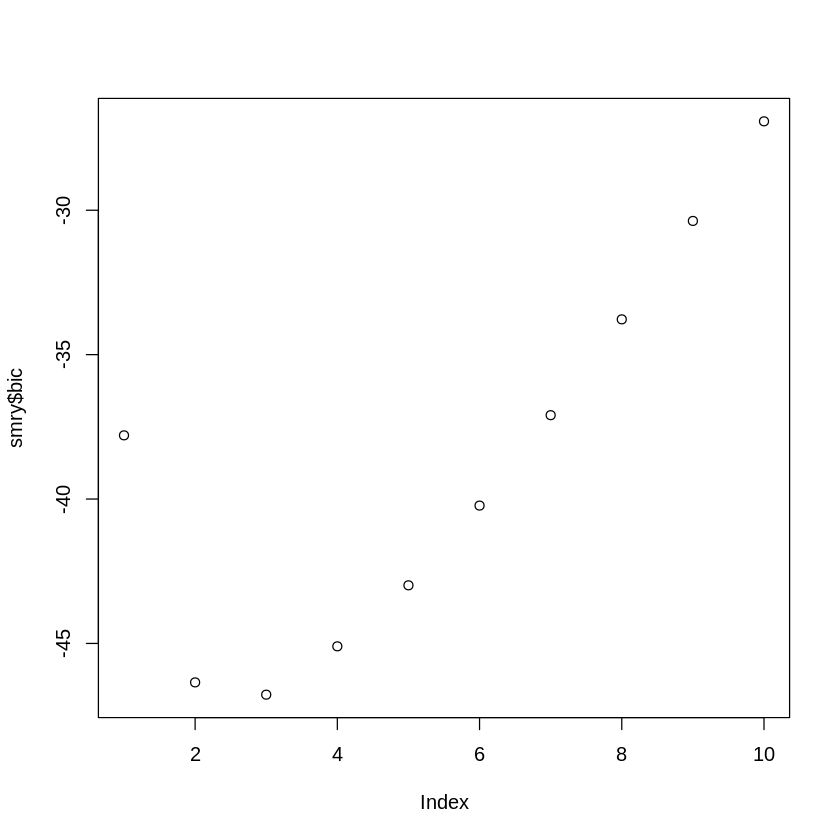

In [22]:
plot(smry$bic)

In [23]:
ii = which.max(smry$adjr2)
ii

[1] 5

In [24]:
best_vars = colnames(smry$which)[smry$which[ii,]][-1]
best_vars

[1] "disp" "hp"   "wt"   "qsec" "am"

In [25]:
fmla = paste0("mpg~",paste(best_vars,collapse="+"))
fmla

[1] "mpg~disp+hp+wt+qsec+am"

In [26]:
best_mod = lm(as.formula(fmla),data=mtcars)

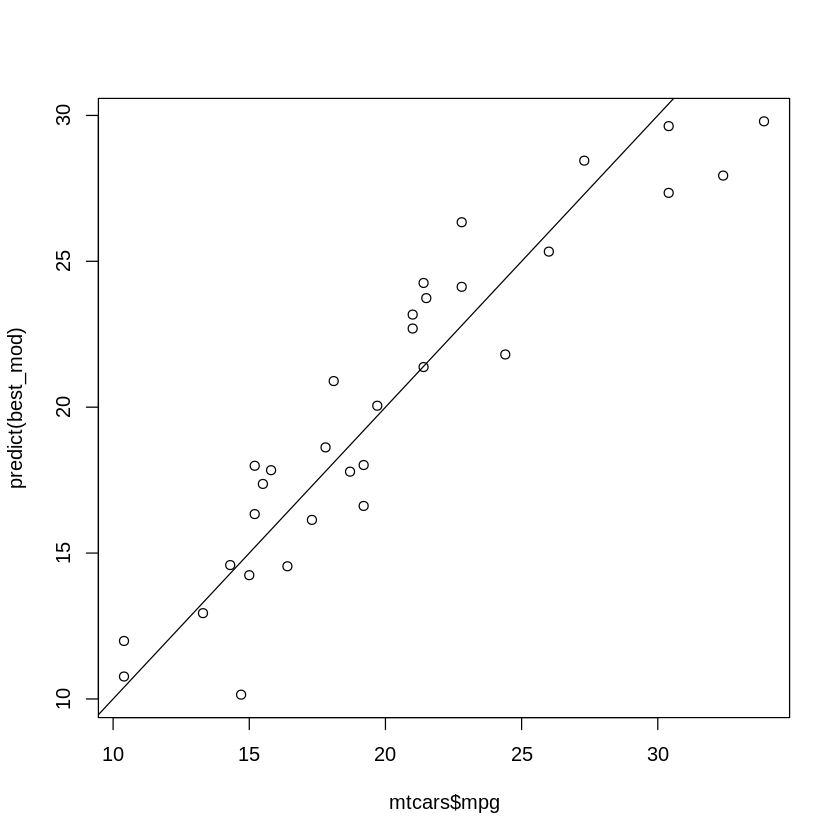

In [27]:
plot(mtcars$mpg,predict(best_mod))
abline(coef=c(0,1))